# Graded Exercise 3: Perceptual Decision Making

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex3_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

Exercise instructions are given in this notebook file.

** Rules: **

1) You are strongly encouraged to work in groups of 2. You are allowed to work alone. Groups of 3 or more are NOT allowed

2) If you work in a group of 2, BOTH people should upload the same notebook file  

3) If you work alone, you can't share your notebook file with anyone else

4) Discussion between groups is encouraged, but you can't share your code or text

5) The points assigned to each exercise are indicated in the notebook file

6) You should upload a jupyter notebook file with all code run and picture visible. We are not going to run your notebook.

7) Read carefully the instructions at the beginning of the notebook file, answer in a clear and concise way to open questions

8) You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester



## References
[1] Wong, K.-F. & Wang, X.-J. A Recurrent Network Mechanism of Time Integration in Perceptual Decisions. J. Neurosci. 26, 1314–1328 (2006).

[2] Parts of this exercise and parts of the implementation are inspired by material from *Stanford University, BIOE 332: Large-Scale Neural Modeling, Kwabena Boahen & Tatiana Engel, 2013, online available.*

## 13. Perceptual Decision Making (Wong & Wang)

In this exercise we study decision making in a network of competing populations of spiking neurons. The network has been proposed by Wong and Wang in 2006 [1] as a model of decision making in a visual motion detection task. The decision making task and the network are described in the [book](http://neuronaldynamics.epfl.ch/online/Ch16.html) and in the original publication (see References [1]).


![test](https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/DecisionMaking_PhasePlane_3.png)
*Decision Space. Each point represents the firing rates of the two subpopulations “Left” and “Right” at a given point in time (averaged over a short time window). The color encodes time. In this example, the decision “Right” is made after about 900 milliseconds.*


The parameters of our implementation differ from the original paper. In particular, the default network simulates only 480 spiking neurons which leads to relatively short simulation time even on less powerful computers.

**Book chapters**

Read the introduction of [chapter 16](https://neuronaldynamics.epfl.ch/online/Ch16.html), Competing populations and decision making. To understand the mechanism of decision making in a network, read 16.2, Competition through common inhibition. You may also want to read the original publication, References [1].

**Python classes**

The module [`competing_populations.decision_making`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.competing_populations.html#neurodynex.competing_populations.decision_making.sim_decision_making_network) implements the network adapted from References [1,2]. 


stimulus start: 0.15, stimulus end: 0.5
simulating 426 neurons. Start: Fri Apr 12 10:11:45 2019


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Fri Apr 12 10:12:26 2019


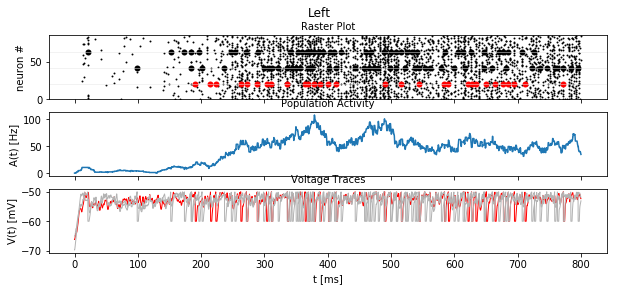

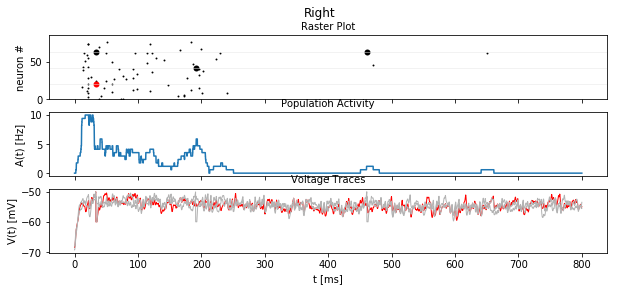

In [1]:
%matplotlib inline
import brian2 as b2
from neurodynex.tools import plot_tools
from neurodynex.competing_populations import decision_making
import matplotlib.pyplot as plt
import numpy as np

decision_making.getting_started()

Before we can analyse the decision making process and the simulation results, we first need to understand the structure of the network and how we can access the state variables of the respective subpopulations.

<img src="https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/DecisionMaking_NetworkStructureAll.png" alt="drawing" width="500"/>
*Network structure. The excitatory population is divided into three subpopulations, shown in the next figure.*

<img src="https://neuronaldynamics-exercises.readthedocs.io/en/latest/_images/DecisionMaking_NetworkStructureDetail.png" alt="drawing" width="500"/>

*Structure within the excitatory population. The “Left” and “Right” subpopulations have strong recurrent weights ($w^+>w^0$) and weak projections to the other ($w^−<w^0$). All neurons receive a poisson input from an external source. Additionally, the neurons in the “Left” subpopulation receive poisson input with some rate $\nu_{left}$; the “Right” subpopulation receives a poisson input with a different rate $\nu_{right}$*

### 3.1.1. Question: Understanding Brian2 Monitors

The network shown in the figure above is implemented in Brian2 in the function `competing_populations.decision_making.sim_decision_making_network()`. Each subpopulation is a Brian2 NeuronGroup. Look at the source code of the function `sim_decision_making_network()` to answer the following questions:



**[1+1+1]**

- For each of the four subpopulations, find the variable name of the corresponding NeuronGroup.
- Each NeuronGroup is monitored with a PopulationRateMonitor, a SpikeMonitor, and a StateMonitor. Find the variable names for those monitors. Have a look at the [Brian2](https://brian2.readthedocs.io/en/stable/user/recording.html) documentation if you are not familiar with the concept of monitors.
- Which state variable of the neurons is recorded by the StateMonitor?

**Answer**

**[2+1]**


- Setting `N_excit=380`how many neurons would be in each excitatory subpopulations?
- To keep the default balance between inhibition and excitation what would be the number of inhibitory neurons?

**Answer**

For the rest of the miniproject, use `N_Excit=380`, and the found value `N_Inhib`.


### 3.1.2\. Question: Accessing a dictionary to plot the population rates[¶](#question-accessing-a-dictionary-to-plot-the-population-rates "Permalink to this headline")

The monitors are returned in a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html?highlight=dictionary#dictionaries) providing access to objects by name. Read the [Python documentation](https://docs.python.org/3/tutorial/datastructures.html?highlight=dictionary#dictionaries) and look at the code block below or the function [`competing_populations.decision_making.getting_started()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.competing_populations.html#neurodynex.competing_populations.decision_making.sim_decision_making_network) to learn how dictionaries are used.

**[6]**

*   Extend the following code block to include plots for all four subpopulations.
*   Run the simulation for 800ms. What are the “typical” population rates of the four populations towards the end of the simulation? (In case the network did not decide, run the simulation again).


In [ ]:

results = decision_making.sim_decision_making_network(N_Excit=???,N_Inhib=??? ,t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=0.6, max_sim_time=???)
plot_tools.plot_network_activity(???, ???,
                                 ???, t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title=???)


plt.show()


**Answer**

**[3+2+1]**

*   Without running the simulation again, but by using the same `results` [dictionary](https://docs.python.org/3/tutorial/datastructures.html?highlight=dictionary#dictionaries), plot the 4 population rates on the same graph using 5 different values of `avg_window_width`. 
*   Interpret the effect of a very short and a very long averaging window.
*   Find a value `avg_window_width` for which the population activity plot gives meaningful rates.

Remark: you should use the function [`PopulationRateMonitor.smooth_rate()`](https://brian2.readthedocs.io/en/2.0.1/user/recording.html#recording-population-rates). 

`avg_window_width = 123*b2.ms`

`sr = results["rate_monitor_A"].smooth_rate(window="flat", width=avg_window_width)/b2.Hz`

**Answer**


## 3.2. Exercise: Stimulating the decision making circuit

The input stimulus is implemented by two inhomogenous Poisson processes: The subpopulation “Left” and “Right” receive input from two different PoissonGroups (see Figure “Network Structure”). The input has a `coherence level c` and is noisy. We have implemented this in the following way: every 30ms, the firing rates $\nu_{left}$ and  $\nu_{right}$  of each of the two PoissonGroups are drawn from a normal distribution:


$\nu_{left}\sim\mathcal{N}(\mu_{left},\sigma^2)$

$\nu_{right}\sim\mathcal{N}(\mu_{right},\sigma^2)$

$\mu_{left}=\mu_0*(0.5+0.5c)$

$\mu_{right}=\mu_0*(0.5-0.5c)$

$c\in[-1,+1]$

The coherence level $c$, the maximum mean $\mu_0$ and the standard deviation $\sigma$ are parameters of `sim_decision_making_network()`.

## 3.2.1. Question: Coherence Level

**[1+1]**

- From the equation above, express the difference $\mu_{left}−\mu_{right}$ in terms of $\mu_0$ and $c$.

- Find the distribution of the difference $\nu_{left}−\nu_{right}$. Hint: the difference of two Gaussian distributions is another Gaussian distribution.


Now look at the documentation of the function [`sim_decision_making_network()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.competing_populations.html#neurodynex.competing_populations.decision_making.sim_decision_making_network) and find the default values of μ0 and σ. Using those values, answer the following questions:

**[1+1]**

- What are the mean firing rates (in Hz) $\mu_{left}$ and $\mu_{right}$ for the coherence level c= +0.2?
- For c= +0.2, how does the difference $\mu_{left}$ and $\mu_{right}$ compare to the variance of $\nu_{left}$ and $\nu_{right}$.

**Answer**

## 3.2.2. Question: Input stimuli with different coherence levels

**[2+1+1]**

Run a few simulations with `c=-0.6` and `c=+0.1`. Plot the network activity.

- Does the network always make the correct decision?
- Look at the population rates and estimate roughly how long it takes the network to make a decision.


**Answer**

## 3.3. Exercise: Decision Space

We can visualize the dynamics of the decision making process by plotting the activities of the two subpopulations “Left” / “Right” in a phase plane (see figure at the top of this page). Such a phase plane of competing states is also known as the _Decision Space_. A discussion of the decision making process in the decision space is out of the scope of this exercise but we refer to Reference [1]



### 3.3.1 Question: Plotting the Decision Space

**[5+2]**

*   Write a function that takes two [RateMonitors](http://brian2.readthedocs.io/en/2.0.1/user/recording.html#recording-population-rates) and plots the _Decision Space_.
*   Add a parameter `avg_window_width` to your function (same semantics as in the exercise above). Run a few simulations and plot the phase plane for different values of `avg_window_width`. Use `c=0.3`.


**[2]**

*   We can use a rate threshold as a decision criterion: We say the network has made a decision if one of the (smoothed) rates crosses a threshold. What are appropriate values for `avg_window_width` and `rate` to detect a decision from the two rates?

### 3.3.2 Question: Implementing a decision criterion

**[4]**

*   Using your insights from the previous questions, implement a function **get_decision_time** that takes two [RateMonitors](http://brian2.readthedocs.io/en/2.0.1/user/recording.html#recording-population-rates) , a `avg_window_width` and a `rate_threshold`. The function should return a tuple (decision_time_left, decision_time_right). The decision time is the time index when some decision boundary is crossed. Possible return values are (1234.5ms, 0ms) for decision “Left”, (0ms, 987.6ms) for decision “Right” and (0ms, 0ms) for the case when no decision is made within the simulation time. A return value like (123ms, 456ms) is an error and occurs if your function is called with inappropriate values for `avg_window_width` and `rate_threshold` and must be considered as such in your code. 

The following code fragments could be useful:

`smoothed_rates_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
idx_A = numpy.argmax(smoothed_rates_A > rate_threshold/b2.Hz)
t_A = idx_A * b2.defaultclock.dt`

Run a few simulations to test your function.

**[1]**

How do the percentage of correct answer evolve with respect to `c`.

**Answer**

# 3.5 Winner-take-all in artificial Neural network

Winner-take-all is a computational models of neural networks by which neurons in a layer compete with each other for activation.  

In the classical form, only the neuron with the highest activation stays active while all other neurons are shut down; however, other variations allow more than one neuron to be active. It may be link to a decision making task as the decision is defined by the winner neuron.

Consider a network of formal neurons described by activities
\begin{equation}
  A_i= g(h_i) = \left\{
    \begin{array}{ll}
    0 & \mbox{ for } h_i<1 \\
    h_i -1& \mbox{ for } 1<h_i<2\\ 
    1& \mbox{ for } h_i>2\\ 
    \end{array}
  \right. .
\end{equation}
for $i=1,...,N$, where $N$ is the number of neurons.
The input potential $h_i$ evolves with the following update rule: 

$\tau\frac{dh_i}{dt}= f(h) = -h_i + w_0g(h_i) - \alpha\sum_{j \neq i} g(h_j) + h_{ext,i}$. (1)

where $w_0$ and $\alpha$ are parameters greater than 0. For $t \leq 0$ the external input vanishes and all the neurons are at their resting potential $h_i=0$. For $t > 0$ we have $h_{ext,i} = 1 + (0.5)^i$

**[1+1]**

- what is the intrepretation of $w_0$ and $\alpha$

**Answer**

## 3.5.1 Implementation of simple winner-take-all

**[2+3]**

- Implement the function $g(h_i)$ which takes in argument $h_i$. 

- Implement the update rule in a simple Euler fashion i.e. $h_i(t+\Delta t) = h_i(t) + \eta f(h(t))$. 

We impose here $\eta = \Delta t / \tau = 0.01$.

**Answer**

In [ ]:
def g(???): ## gain function ##
    return  ???  ## takes a vector returns a vector of all neurons ##

def update_rule(???): ## update rule for the potentials ##
    return ??? ## takes a vector returns a vector of all neurons ##

**[3]**
- Now run a simulation for a small network of `10 neurons` for $500$ time steps, with $w_0=2$ and $\alpha=1$. and plot the resulting activities. Comment on what you observe.


In [ ]:
N_neuron = ???
alpha = ???
w0 = ???
eta = ???
h = ??? ## initial potential of the neurons (vector) ##
dic_evolution = {}
dic_evolution['activities'] = []
for i in range(???):
    
    ## Implement the update ##
    
    dic_evolution['activities'] += [???] ## add the activity at time t to the list ##

**Answer**

## 3.5.2 Influence of the parameters

**[1+1]**

- What happens if you decrease $\alpha$? (Keep $w_0=2$)

- What happens if you decrease $w_0$? (Keep $\alpha=1$)

justify your answer by the means of plots.

**Answer**

**[2+2]**

Derive sufficient conditions so that the only fixed point is $A_i = \delta_{i,1}$, i.e. only the neuron with the highest external input can be a winner. Write the derived answer and show the critical behaviour.

hints:

- only $h_1$ can be greater than 2 (i.e. $A_1 =1$) all the other must have zero acitivity

**Answer**

## 3.5.3 Implementation of a K-winners-take-all


**[2+1+1+2]**

By adapting both $w_0$ and $\alpha$ one can update our previous network to obtain a K-winners-take-all neuron, i.e. K neurons will reach an activity of 1.

- Find a necessary condition on $w_0$ as a function of $\alpha$ such that exactly $K$ neurons have activity 1, where the others have all 0 activity.

hint:
- the fixed point of $h_K$ has to be greater than 2 (i.e. $A_K =1$), the K-1 neurons which recive a stronger input have also activity 1 and all the other must have zero acitivity.


- One can persuade himself that the following equations are sufficient conditions for alpha. Solve them then **implement the network for K=3 winners**.
\begin{align}
-K\alpha+1+0.5^{K+1} \leq 1 \\
-(K-1)\alpha+1+0.5^K>1 \\
\end{align}
- plot your results, showing the critical behaviour.


## 3.5.4 stochastic input, winners-take-all

In biological neural network we often consider noisy input coming from background activity. In this exercice we want you to observe the influence of the noise in the winner-take-all process. 

To do so consider $w0=2$ and $\alpha=2$ and define the external input as $h_{ext,k}= 1 + 0.5^k +\xi(t)$, where $\xi(t)$  is a white noise of standard deviation 1.

**[2+1]**

- implement the white noise and run a simulation, what do you observe ? Compute the probability of the neuron 1 to win

**Answer**

**[3]**

- Now consider the external input $h_{ext,k}= 1 + 0.9^k +\xi(t)$. Run a few simulations to estimate the probability of neuron 1 to win. Comment on the differences you observe [max 5 lines]

**Answer**